# Wine Quality Detector.

In [1]:
# Importing the libraries and reading the file.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

wine = pd.read_csv('winequality.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


### Understanding the data

In [2]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [4]:
# To be able to have only numeric values.. i differantiated the color of the wine by 0 and 1

i = 0
for col in wine[['color']]:
    for i in range(len(wine[col])):
        if wine['color'][i] == 'white':
            wine['color'][i] = 0
        elif wine['color'][i] == 'red':
            wine['color'][i] = 1
        

<ipython-input-4-3ade7e9c9bcd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['color'][i] = 1
<ipython-input-4-3ade7e9c9bcd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['color'][i] = 0


In [5]:
wine[['color']].value_counts()

color
0        4898
1        1599
dtype: int64

### EDA

<AxesSubplot:xlabel='color', ylabel='count'>

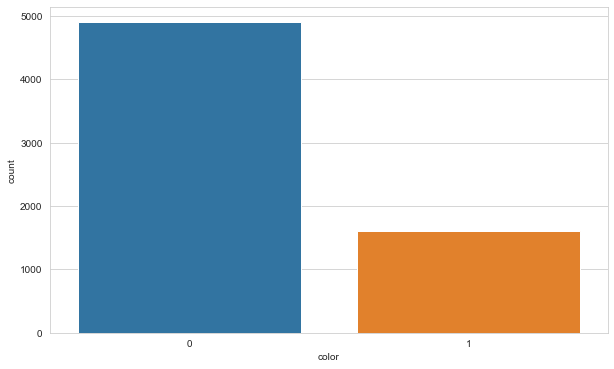

In [20]:
plt.figure(figsize=(10,6))

sns.set_style('whitegrid')

sns.countplot(x='color',data=wine)

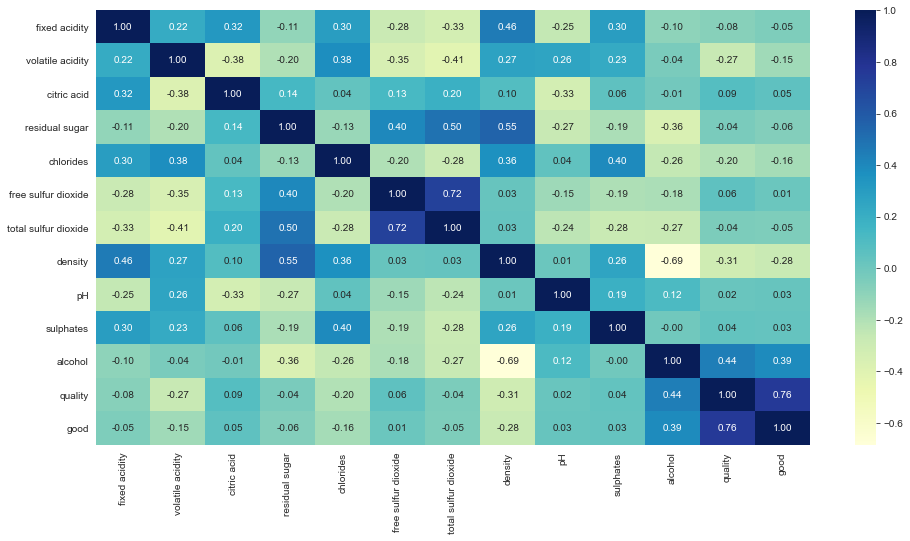

In [7]:
corr=wine.corr()
plt.figure( figsize=(16,8))

hm = sns.heatmap(corr, 
                 cmap='YlGnBu',
                 annot=True, 
                 fmt='.2f')   

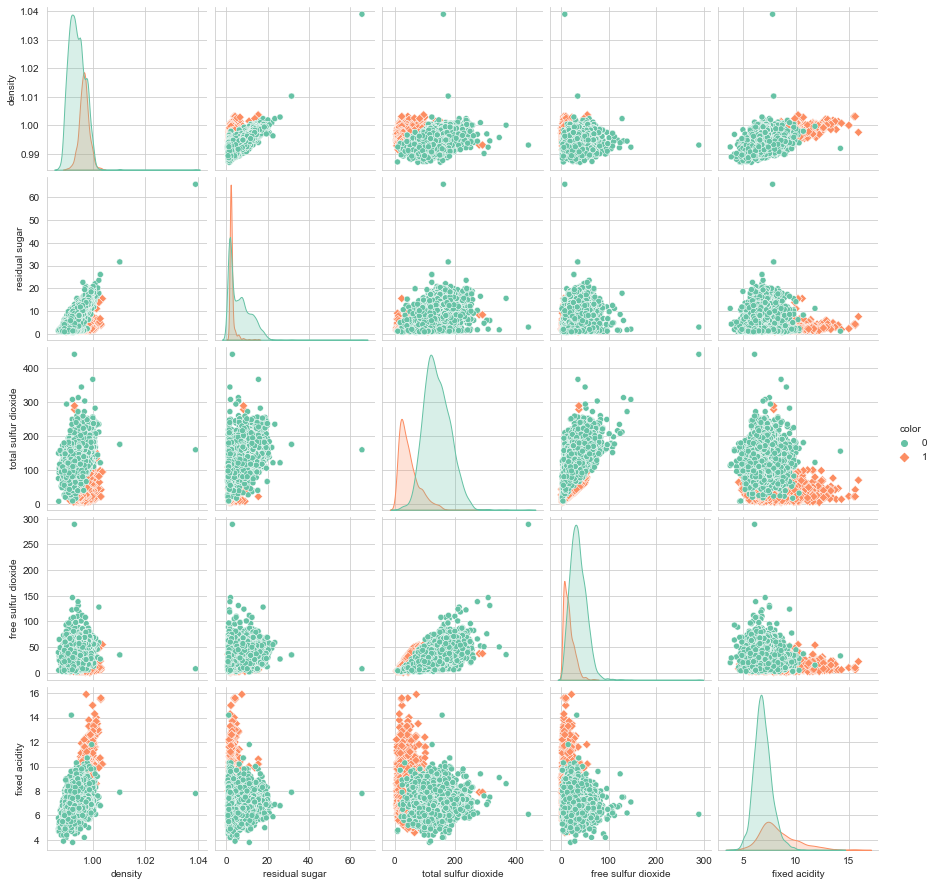

In [8]:
sns.set_style('whitegrid')
cols = ['density',  'residual sugar',  'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity','color']
sns.pairplot(wine[cols], kind="scatter", hue="color", markers=["o", "D"], palette="Set2")
plt.show()

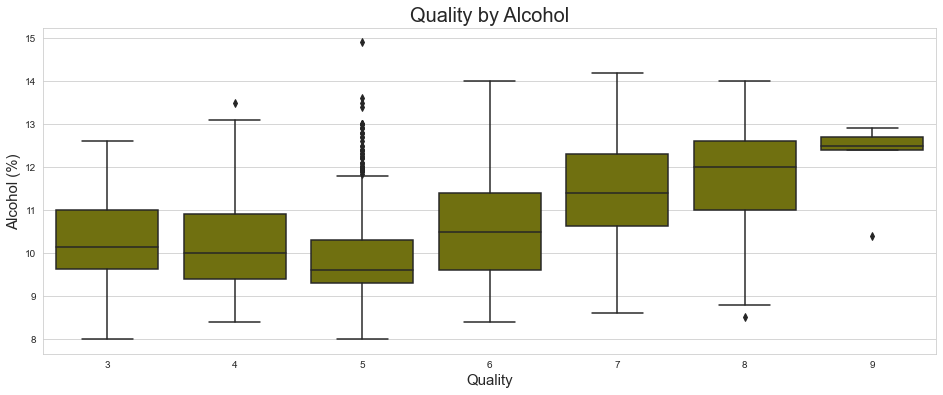

In [9]:
plt.figure(figsize=(16,6))
graph = sns.boxplot(x='quality', y='alcohol',
                 data=wine,
                 color='olive')
graph.set_title("Quality by Alcohol", fontsize=20)
graph.set_xlabel("Quality", fontsize=15)
graph.set_ylabel("Alcohol (%)", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

<Figure size 1440x1440 with 0 Axes>

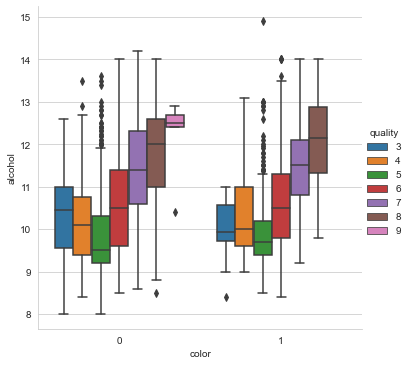

In [56]:
plt.figure(figsize=(20,20))
sns.catplot(x="color", y="alcohol", kind="box", hue="quality", data=wine)
plt.show()

### Modeling

In [31]:
y = wine['quality']
X = wine.drop(['quality'], axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Minmaxtransformer = MinMaxScaler().fit(X)
list_normalized = Minmaxtransformer.transform(X)
list_normalized

data_normalized = pd.DataFrame(list_normalized, columns=X.columns) 
data_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.0,0.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.0,0.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.0,0.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0,0.0


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 13)
(1300, 13)
(5197,)
(1300,)


In [14]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.6445648706404647